<a href="https://colab.research.google.com/github/Mohammed343-a11/Mohammed343-a11/blob/main/Multi%20class%20brain%20tumur%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing our drive for taking dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**extracting our dataset frome drive**

In [ ]:
!pip install unrar
!unrar x /content/drive/MyDrive/Untitled_folder/Training.rar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/drive/MyDrive/Untitled_folder/Training.rar

Creating    Training                                                  OK
Creating    Training/glioma_tumor                                     OK
Extracting  Training/glioma_tumor/image(1).jpg                             0%  OK 
Extracting  Training/glioma_tumor/image(10).jpg                            0%  OK 
Extracting  Training/glioma_tumor/image(100).jpg                           0%  OK 
Extracting  Training/glioma_tumor/image(11).jpg                            1%  OK 
Extracting  Training/glioma_tumor/image(12).jpg                            1%  OK 
Extracting  Training/glioma_tumor/image(13).jpg                            1%  OK 
Extracting  Training/glioma_tumor/image(14).jpg           

**importing some useful library**

In [204]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import keras.utils as image
from keras.applications.resnet_v2 import preprocess_input
from keras.models import load_model

**Installing split folder for traning testing and vadkidating data**

In [ ]:
!pip install split-folders

In [205]:
import splitfolders
splitfolders.ratio("../content/Training", output="output",  ratio=(.8,0.1,0.1)) 

Copying files: 394 files [00:01, 324.05 files/s]


**spliting our data set for 80% traning 10% testing and 10% validating**

In [ ]:
# Specifying the data directory and image dimensions
train_data_dir = '/content/output/train'
validation_data_dir = '/content/output/val'
test_data_dir = '/content/output/test'
img_width, img_height = 150, 150

**preprocess the datas using imagdatagenerator function and apply data augmentation for traing set**

In [ ]:
# Defining the data generators for training and validation sets
train_datagen = ImageDataGenerator(
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')


Found 315 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Found 41 images belonging to 4 classes.


**specify the length of the dataset in each splited folder within sub directory**

In [ ]:
import os
list = os.listdir("/content/output/train/glioma_tumor") + os.listdir("/content/output/train/meningioma_tumor") + os.listdir("/content/output/train/no_tumor")  + os.listdir("/content/output/train/pituitary_tumor")# dir is your directory path
Total_Traindata = len(list)

list = os.listdir("/content/output/val/glioma_tumor") + os.listdir("/content/output/val/meningioma_tumor") + os.listdir("/content/output/val/no_tumor")  + os.listdir("/content/output/val/pituitary_tumor")# dir is your directory path
Total_Valdata = len(list)

list = os.listdir("/content/output/test/glioma_tumor") + os.listdir("/content/output/test/meningioma_tumor") + os.listdir("/content/output/test/no_tumor")  + os.listdir("/content/output/test/pituitary_tumor")# dir is your directory path
Total_Testdata = len(list)

print (Total_Traindata)
print (Total_Valdata)
print (Total_Testdata)

315
38
41


**Visualize the size of the traning ,validating  and testing data in grapycal manner** 

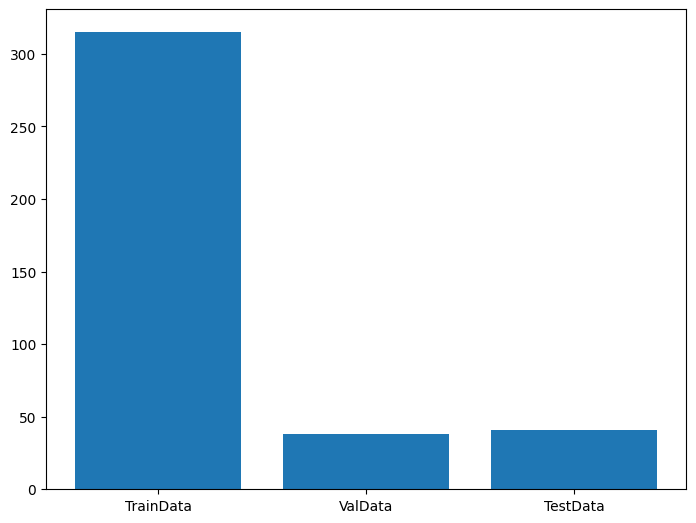

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['TrainData', 'ValData', 'TestData']
Data = [Total_Traindata,Total_Valdata,Total_Testdata ]
ax.bar(langs,Data)
plt.show()

**Creating the CNN model using pre-trained ResNet50V2 architecture**

In [ ]:
# Creating the CNN model using pre-trained ResNet50V2 architecture
base_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

base_model.trainable = False

model = models.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(4, activation='softmax')
])

 Compiling the model  and show summary of the model


In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 5, 5, 2048)        23564800  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                131136    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 23,696,196
Trainable params: 131,396
Non-trainable params: 23,564,800
____________________________________

**Modify earlystoping and model cheakpoint during training**

In [206]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stoping
er=EarlyStopping(monitor="accuracy",min_delta=0.01,patience=17,verbose=1,mode='auto')
#model cheakpoint
mc=ModelCheckpoint(monitor="accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')
cd=[er,mc]

Train the model by fitting with our traning data

In [207]:

# Training the model
history = model.fit(
    train_generator,
    epochs=16,
    validation_data=validation_generator,
    validation_steps=11,
    callbacks=[mc,er])


Epoch 1/16
10/10 [==============================] - ETA: 0s - loss: 0.2796 - accuracy: 0.8857


Epoch 1: accuracy improved from -inf to 0.88571, saving model to ./bestmodel.h5
10/10 [==============================] - 20s 2s/step - loss: 0.2796 - accuracy: 0.8857 - val_loss: 0.8612 - val_accuracy: 0.6316
Epoch 2/16
10/10 [==============================] - ETA: 0s - loss: 0.3126 - accuracy: 0.8698
Epoch 2: accuracy did not improve from 0.88571
10/10 [==============================] - 19s 2s/step - loss: 0.3126 - accuracy: 0.8698
Epoch 3/16
10/10 [==============================] - ETA: 0s - loss: 0.2148 - accuracy: 0.9238
Epoch 3: accuracy improved from 0.88571 to 0.92381, saving model to ./bestmodel.h5
10/10 [==============================] - 18s 2s/step - loss: 0.2148 - accuracy: 0.9238
Epoch 4/16
10/10 [==============================] - ETA: 0s - loss: 0.2160 - accuracy: 0.9048
Epoch 4: accuracy did not improve from 0.92381
10/10 [==============================] - 17s 2s/step - loss: 0.2160 - accuracy: 0.9048
Epoch 5/16
10/10 [==============================] - ETA: 0s - loss: 0.

Save the best model among all epoch

In [208]:
model.save('./bestmodel.h5')

In [209]:
hist = history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Graphycal representation of our accurecy within training data**

Text(0, 0.5, 'accuracy')

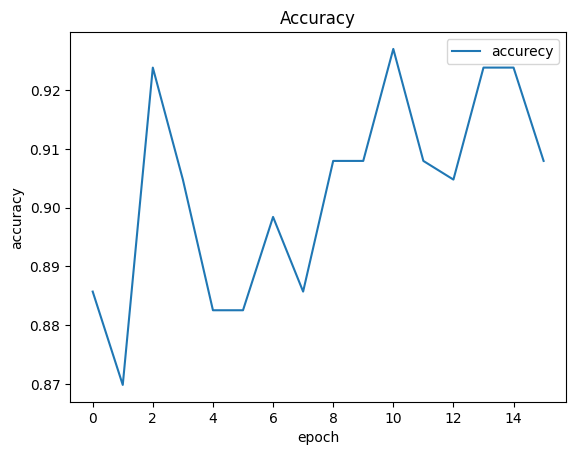

In [210]:
plt.plot(hist["accuracy"])
plt.title("Accuracy")
plt.legend(["accurecy","val_accurecy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

**Graphycal representation of our accurecy within training data**

Text(0, 0.5, 'Loss')

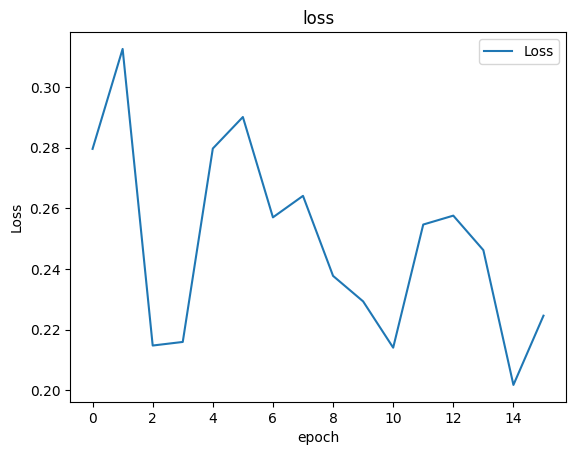

In [211]:
plt.plot(hist["loss"])
plt.title("loss")
plt.legend(["Loss"])
plt.xlabel("epoch")
plt.ylabel("Loss")

**evaluate our model with resoect to test (unseen )data**

In [212]:
model.evaluate_generator(test_generator)

<ipython-input-212-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.7521723508834839, 0.707317054271698]

Load our saved model

In [213]:
model = load_model('/content/bestmodel.h5')

Find out the name of class with respect to thire lable value 

In [214]:
train_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

Select Any image frome the test data and test the model prediction

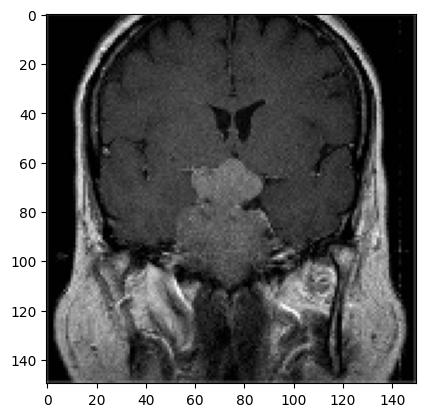

1/1 [==============================] - 0s 73ms/step
glioma_tumor: 0.03
meningioma_tumor: 0.26
no_tumor: 0.00
pituitary_tumor: 0.70
1/1 [==============================] - 0s 72ms/step
The predicted class is pituitary_tumor


In [216]:
# Load test image
test_image = tf.keras.utils.load_img('/content/output/test/pituitary_tumor/image(6).jpg', target_size=(img_width, img_height))
plt.imshow(test_image)
plt.show()
# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Get predicted probabilities for each class
predictions = model.predict(test_image)

# Print the class labels and their corresponding probabilities
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor','pituitary_tumor'] # Update with actual class labels
for label, probability in zip(class_labels, predictions[0]):
    print(f'{label}: {probability:.2f}')

pred=model.predict(test_image)
output_class=class_labels[np.argmax(pred)]
print("The predicted class is", output_class)

In [232]:

!pip install streamlit
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [233]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import cv2
from PIL import Image, ImageOps
import numpy as np
 
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/bestmodel.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()
 
st.write("""
         # Image Classification
         """
         )
 
file = st.file_uploader("Upload the image to be classified U0001F447", type=["jpg", "png"])
st.set_option('deprecation.showfileUploaderEncoding', False)
 
def upload_predict(upload_image, model):
    
        size = (180,180)    
        image = ImageOps.fit(upload_image, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_resize = cv2.resize(img, dsize=(224, 224),interpolation=cv2.INTER_CUBIC)
        
        img_reshape = img_resize[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        pred_class=decode_predictions(prediction,top=1)
        
        return pred_class
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = upload_predict(image, model)
    image_class = str(predictions[0][0][1])
    score=np.round(predictions[0][0][2]) 
    st.write("The image is classified as",image_class)
    st.write("The similarity score is approximately",score)
    print("The image is classified as ",image_class, "with a similarity score of",score)

Writing app.py


In [234]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8508
  External URL: http://35.199.172.224:8508

  Stopping...
^C


In [ ]:
!streamlit hello --server.headless=true




  Welcome to Streamlit. Check out our demo in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.199.172.224:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!


